In [10]:
#Variables that contains the user credentials to access Twitter API
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""


In [13]:
#crawl friends data

import os
import sys
import json
import time
import math
from tweepy import Cursor
import tweepy
from tweepy import OAuthHandler

# authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

MAX_FRIENDS = 150000

def paginate(items, n):
    """Generate n-sized chunks from items"""
    for i in range(0, len(items), n):
        yield items[i:i+n]
        
screen_name = "xiaomi" #enter screen name on who you would like to check on it.
max_pages = math.ceil(MAX_FRIENDS / 5000)


count = 0
fname = "output/assign/users/{}/friends.json".format(screen_name)
with open(fname) as f: 
    print("\nFriends:")
    for line in f:
        friend = json.loads(line)
        friend_screen_name = friend['screen_name']
        print(count)
        print(friend_screen_name)
            
        if count==163:
            # get friends for a given user
            fname = "output/assign/users/{}.json".format(friend_screen_name)
            with open(fname, 'w') as f:
                for friends in Cursor(api.friends_ids, screen_name=friend_screen_name).pages(max_pages):
                    for chunk in paginate(friends, 100):
                        users = api.lookup_users(user_ids=chunk)
                        for user in users:                   
                            f.write(json.dumps(user._json)+"\n")
                    if len(friends) == 5000:
                        print("More results available. Sleeping for 60 seconds to avoid rate limit")
                        time.sleep(60)

          
            
        count=count + 1
            
                
            
    
print("\n second level task completed")
    


Friends:
0
AndroidPolice
1
Google
2
ShareSavebyMi
3
expertreviews
4
LinusTech
5
Mike_tompkins
6
Powentwr
7
XiaomiChile
8
mi_turkiye
9
XiaomiUK
10
IndiaPOCO
11
PocophoneGlobal
12
MIUI_India
13
cristianoamon
14
christhall
15
sankalp_sp
16
MWCapital
17
UnboxTherapy
18
brandieclaborn
19
JournalDuGeek
20
PCMagME
21
dariasolo
22
TeKSapo
23
KevinKwangCNA
24
xiaomiarabia
25
MiNepalOfficial
26
mi_pakistan
27
XiaomiKSA_
28
Mobike
29
TechJuicePk
30
Xiaomi_Mx
31
ItaliaXiaomi
32
xiaomi_france
33
XiaomiEspana
34
XiangW_
35
XiaomiUSA
36
RedmiIndia
37
xiaomigeek
38
donovansung
39
XiaomiSG
40
ShouZiChew
41
tonyweilai
42
MiBrasil
43
Forbes
44
WSJ
45
kleinerperkins
46
XiaomiMY
47
C4ETech
48
xiaomiindonesia
49
atytse
50
tim
51
nickstatt
52
jaimani
53
benthompson
54
MKBHD
55
binlin_xiaomi
56
XiaomiIndia
57
manukumarjain
58
MiPhilippines
59
techreview
60
hbarra
61
leijun
62
linglingfa
63
phonearena
64
ZDNet
65
selop
66
androidtapp
67
futureshift
68
jaredrummler
69
MacTrast
70
androidPT
71
joshuatopolsky
72

In [ ]:
#create nodelist

import pandas as pd
import csv
import json
import glob


df=pd.read_json('output3/users/@oppo/friends_2019-02-26.json', lines=True)
df = df[pd.notnull(df['screen_name'])]
df = df.sort_values(by=['friends_count'], ascending=False)
df=df.iloc[:10]
df.to_csv('opponodelist_10_10b.csv')
oppo_top10_f = df['screen_name'].values
        
for friend in oppo_top10_f:
    files = glob.glob("output3/users/oppo's friend/{}/*".format(friend)) #data folder
    fname2 = files[0]
    df=pd.read_json(fname2, lines=True)
    df = df[pd.notnull(df['screen_name'])]
    df = df.sort_values(by=['friends_count'], ascending=False)
    df=df.iloc[:10]
    df.to_csv('opponodelist_10_10b.csv', mode='a', header=False)


In [ ]:
#filter nodelist

import pandas as pd
import csv
import json


df = pd.read_csv('opponodelist_10_10b.csv', usecols=['screen_name', 'location', 'created_at', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count'])
df.drop_duplicates()

df.to_csv('opponodelist_10_10b.csv')

In [140]:
#create edges

import pandas as pd
import csv
import json
pd.options.mode.chained_assignment = None

node_df = pd.read_csv('opponodelist_10_10b.csv')
nodes = node_df['screen_name'].values

df=pd.read_json('output3/users/@oppo/friends_2019-02-26.json', lines=True)
df2 = df[['screen_name']]
df2 = df2[df2.screen_name.isin(oppo_top10_f)]
df2['source'] = 'oppo'
df2.columns = ['Target', 'Source']        
df2=df2[['Source','Target']]
df2.to_csv('oppoedgelist_10_10b.csv',index=False)
        
for friend in oppo_top10_f:
    files = glob.glob("output3/users/oppo's friend/{}/*".format(friend)) #data folder
    fname2 = files[0]
    df=pd.read_json(fname2, lines=True)

    if df.empty == False:
        df = df.sort_values(by=['friends_count'], ascending=False)
        df2 = df[['screen_name']]
        df2['Source'] = friend
        df2.columns = ['Target', 'Source']        
        df2=df2[['Source','Target']]
        df2 = df2[df2.Source.isin(nodes)]
        df2 = df2[df2.Target.isin(nodes)]
        df2.to_csv('oppoedgelist_10_10b.csv', mode='a', header=False,index=False)
        print('----------------------done------')
    else: print('=====================file empty======')


DigitalTrends 110000
After filter:  110000
----------------------done------
nokia 64998
After filter:  64998
----------------------done------
Qualcomm 13031
After filter:  13031
----------------------done------
ajmcgr 4824
After filter:  4824
----------------------done------
StarsBBL 3980
After filter:  3980
----------------------done------
GadgetsBoy 1897
After filter:  1897
----------------------done------
NyleDiMarco 1187
After filter:  1187
----------------------done------
Lamborghini 1075
After filter:  1075
----------------------done------
T20WorldCup 995
After filter:  995
----------------------done------
xdadevelopers 985
After filter:  985
----------------------done------


In [141]:
#remove duplicates edges

import pandas as pd
import csv
import json


df = pd.read_csv('oppoedgelist_10_10b.csv')
mask = df['Source'] < df['Target']
df['first'] = df['Source'].where(mask, df['Target'])
df['second'] = df['Target'].where(mask, df['Source'])
df = df.drop_duplicates(subset=['first', 'second'])
df=df[['Source', 'Target']]
df.to_csv('oppoedgelist_10_10b.csv',index=False)

df

,Source,Target
0,oppo,GadgetsBoy
1,oppo,T20WorldCup
2,oppo,DigitalTrends
3,oppo,StarsBBL
4,oppo,Qualcomm
5,oppo,nokia
6,oppo,Lamborghini
7,oppo,ajmcgr
8,oppo,NyleDiMarco
9,oppo,xdadevelopers


In [111]:
import csv
import networkx as nx
from operator import itemgetter
import community #This is the python-louvain package we installed.
import matplotlib.pyplot as plt

In [215]:
#read nodelist and edgelist file

with open('opponodelist_10_10b.csv', 'r', encoding='utf-8') as nodecsv:                 
    nodereader = csv.reader(nodecsv)  
    nodes = [n for n in nodereader][1:]   

node_names = [n[7] for n in nodes] # column 7 is the screen_name

with open('oppoedgelist_10_10b.csv', 'r') as edgecsv: 
    edgereader = csv.reader(edgecsv)      
    edges = [tuple(e) for e in edgereader][1:] 

#create graph object
G = nx.Graph()

#add lists of nodes and edges 
G.add_nodes_from(node_names)
G.add_edges_from(edges)



In [216]:
location_dict = {}
created_at_dict = {}
followers_count_dict = {}
friends_count_dict = {}
listed_count_dict = {}
statuses_count_dict = {}
favourites_count_dict = {}

In [217]:
#observe the file quakers_nodelist.csv on each attribute positioning
for node in nodes: # Loop through the list, one row at a time
#     print(node[0],node[6])
    location_dict[node[7]] = node[6] #职业,Historical Significance
    created_at_dict[node[7]] = node[1]
    followers_count_dict[node[7]] = node[3]
    friends_count_dict[node[7]] = node[4]
    listed_count_dict[node[7]] = node[5]
    statuses_count_dict[node[7]] = node[8]
    favourites_count_dict[node[7]] = node[2]

In [218]:
# Add each dictionary as a node attribute to the Graph object
nx.set_node_attributes(G, name = 'location', values = location_dict)
nx.set_node_attributes(G, name = 'created_at', values = created_at_dict)
nx.set_node_attributes(G, name = 'followers_count_year', values = followers_count_dict)
nx.set_node_attributes(G, name = 'friends_count_year', values = friends_count_dict)
nx.set_node_attributes(G, name = 'listed_count', values = listed_count_dict)
nx.set_node_attributes(G, name = 'statuses_count', values = statuses_count_dict)
nx.set_node_attributes(G, name = 'favourites_count', values = favourites_count_dict)

In [219]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len) 
#print(largest_component)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

True
Network diameter of largest component: 4


In [221]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.029424398625429553


In [222]:
person_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, name ='person_dict', values = person_dict)

In [223]:
Degree_centrality = person_dict.items()
sorted_degree = sorted(person_dict.items(), key=itemgetter(1), reverse=True)
print(sorted_degree[:10])

[('Qualcomm', 19), ('ajmcgr', 18), ('nokia', 17), ('GadgetsBoy', 17), ('NyleDiMarco', 15), ('DigitalTrends', 14), ('StarsBBL', 13), ('Lamborghini', 13), ('T20WorldCup', 11), ('xdadevelopers', 11)]


In [224]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, name = 'betweenness', values = betweenness_dict)
nx.set_node_attributes(G, name = 'eigenvector', values =eigenvector_dict)

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)
   
print("\nTop 10 nodes by eigenvector centrality:")
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
for e in sorted_eigenvector[:10]:
    print(e)

Top 10 nodes by betweenness centrality:
('oppo', 0.4311058106123894)
('Qualcomm', 0.2183361853180932)
('nokia', 0.21417405572010836)
('StarsBBL', 0.21243159983291568)
('DigitalTrends', 0.20314507860560493)
('ajmcgr', 0.20040317808409935)
('GadgetsBoy', 0.1916712591136933)
('NyleDiMarco', 0.18282286366167957)
('T20WorldCup', 0.14992548448140558)
('Lamborghini', 0.103815188223083)

Top 10 nodes by eigenvector centrality:
('Qualcomm', 0.3994007437877685)
('GadgetsBoy', 0.35320099072171657)
('oppo', 0.3182107601985083)
('ajmcgr', 0.30516112761907715)
('nokia', 0.2808267469870798)
('xdadevelopers', 0.2499844361696922)
('DigitalTrends', 0.21451300801325915)
('Lamborghini', 0.18554179789803388)
('NyleDiMarco', 0.17052755985493756)
('SamsungUS', 0.16414371816451914)


In [234]:
sorted_communities = sorted(part.items(), key=itemgetter(1), reverse=False)
num_communities = sorted_communities[len(sorted_communities)-1][1]

community_members=[]

for i in range(num_communities+1):
    temp = []
    for x in sorted_communities:
        if x[1]== i:
            temp.append([x[0],G.node[x[0]]['betweenness'],G.node[x[0]]['eigenvector']])
    community_members.append([i,temp])

most_centrality = []
for x in community_members:
    max_betweenness = 0
    max_eigenvector = 0
    betweenness_name = ''
    eigenvector_name = ''
    for y in x[1]:
        if y[1] > max_betweenness:
            max_betweenness = y[1]
            betweenness_name = y[0]
        if y[2] > max_eigenvector:
            max_eigenvector = y[2]
            eigenvector_name = y[0]
    most_centrality.append([x[0],[betweenness_name,max_betweenness],[eigenvector_name,max_eigenvector]])
            


most_centrality

[[0,
  ['DigitalTrends', 0.20314507860560493],
  ['DigitalTrends', 0.21451300801325915]],
 [1, ['nokia', 0.21417405572010836], ['nokia', 0.2808267469870798]],
 [2, ['Qualcomm', 0.2183361853180932], ['Qualcomm', 0.3994007437877685]],
 [3, ['ajmcgr', 0.20040317808409935], ['ajmcgr', 0.30516112761907715]],
 [4, ['oppo', 0.4311058106123894], ['oppo', 0.3182107601985083]],
 [5, ['GadgetsBoy', 0.1916712591136933], ['GadgetsBoy', 0.35320099072171657]],
 [6,
  ['NyleDiMarco', 0.18282286366167957],
  ['NyleDiMarco', 0.17052755985493756]],
 [7, ['T20WorldCup', 0.14992548448140558], ['verified', 0.1390030961020002]]]

In [232]:
import pickle
with open('most_centrality.pkl','wb') as f:
    pickle.dump(most_centrality,f)

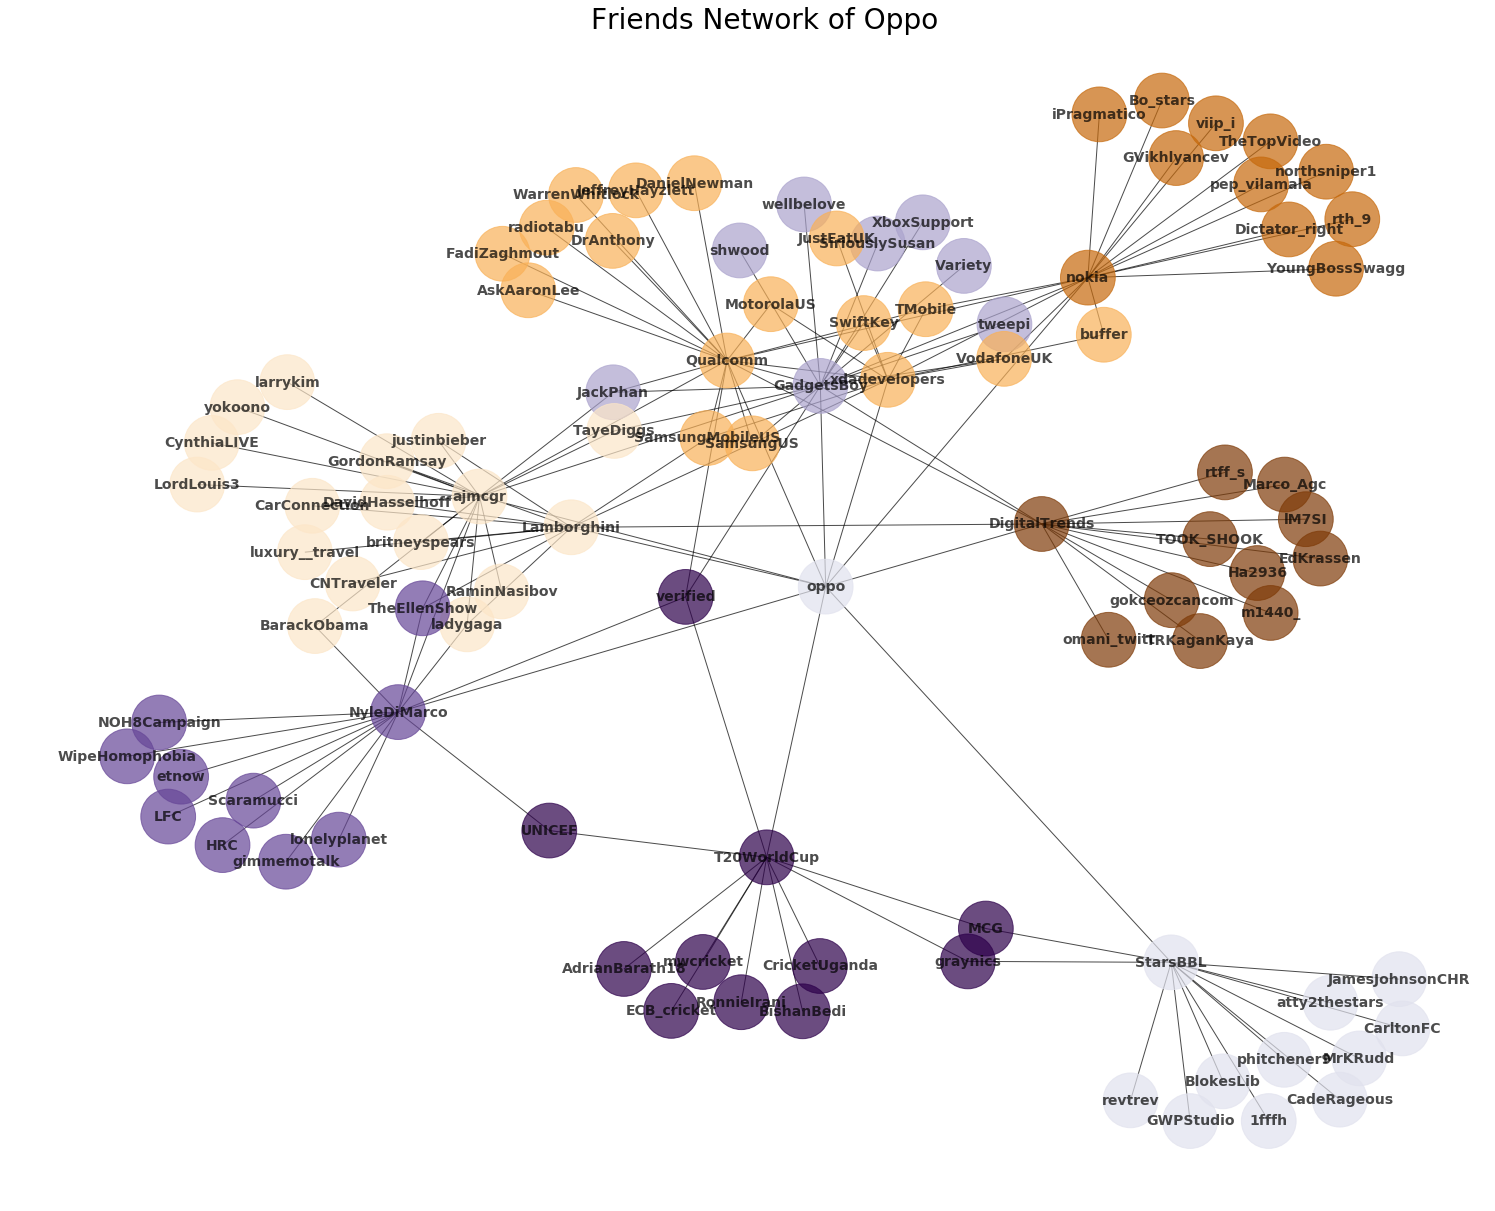

In [178]:
#Based on Louvain heuristices
#https://perso.uclouvain.be/vincent.blondel/research/louvain.html
part = community.best_partition(G)


# Color mapping using community structure
values = [part.get(node) for node in G.nodes()]
#values = [mod.get(node) for node in G.nodes()]

#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
#https://matplotlib.org/examples/color/colormaps_reference.html

plt.figure(figsize=(20,16))
nx.draw_spring(G, cmap=plt.get_cmap('PuOr'), node_color = values,node_size=3000,alpha=0.7,with_labels=True,font_color='black',font_size=14, font_weight='bold')
plt.title('Friends Network of Oppo', fontsize=28)
plt.savefig("Graph.png", format="PNG")
plt.show()
